# Prevendo Customer Churn em Operadoras de Telecom


## Uma breve introdução

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

## Sobre o estudo

Aqui, iremos prever o Customer Churn - rotatividade de clientes -  em uma Operadora de Telecom. Temos dois datasets, um de treino e um de teste. O objetivo é criar um modelo de aprendizagem de máquina que possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade de isso ocorrer. O cabeçalho do dataset é uma descrição do tipo de informação em cada coluna.

## Importando a biblioteca

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dos módulos

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
# Carregando os dados de teste
arq_test = '../Dados/projeto4_telecom_teste.csv'
df_test = pd.read_csv(arq_test)
df_test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [3]:
print('O arquivo de teste possui ' + str(df_test.shape[0]) + ' linhas e ' + str(df_test.shape[1]) + ' colunas.')

O arquivo de teste possui 1667 linhas e 21 colunas.


In [4]:
# Carregando os dados de treino
arq_train = '../Dados/projeto4_telecom_treino.csv'
df_train = pd.read_csv(arq_train)

In [5]:
print('O arquivo de treino possui ' + str(df_train.shape[0]) + ' linhas e ' + str(df_train.shape[1]) + ' colunas.')

O arquivo de treino possui 3333 linhas e 21 colunas.


## Limpeza dos dados

Primeiramente, faremos a limpeza  dos dados e tratamento das variáveis.

In [6]:
df_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


Acima, podemos verificar como os dados estão estruturados. Agora, precisamos saber em que tipo as variáveis estão sendo identificadas. Para isso, utilizaremos o domando dtypes. 

In [7]:
df_train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

Podemos notar que temos variáveis do tipo object (ou string), int e float. A princípio, a linguagem interpretou de forma correta. <br /><br />
A coluna 'Unnamed: 0' é indicadora de número da linha e será retirada. 

In [8]:
# Retirar a coluna do dataset de treino e teste
df_train = df_train.drop(columns='Unnamed: 0')

df_test = df_test.drop(columns='Unnamed: 0')

É importante verificar se existem valores nulos na base, uma vez que eles podem interferir negativamente na nossa análise.

In [9]:
# Verificando valores nulos
df_train.isnull().values.any()

False

Ótimo, não temos valores nulos. Podemos agora iniciar a análise descritiva e visualização dos dados.

## Vizualização dos dados

Abaixo, vamos visualizar as informações de todas as colunas númericas para vermos se há algum valor indevido. O comando describe nos retorna informações como média, valor mínimo e máximo, quartis, dentre outras. Além disso, fazremos histograma para ter visão geral dessas variáveis.

In [10]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


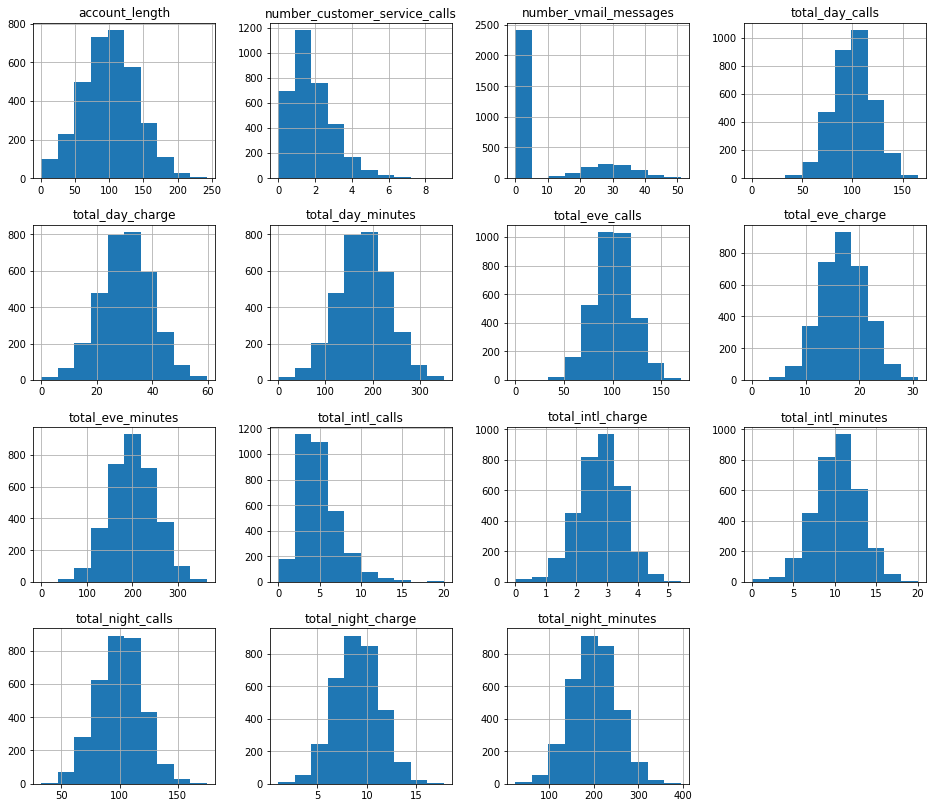

In [11]:
# Histograma das variáveis numéricas
df_train.hist(figsize=(16,14));

Para as variáveis qualitativas, construíremos gráficos com a frequência para cada categoria a fim de obter alguns insights que nos ajudem nas tomadas de decisões. 

In [12]:
# Selecionando as variáveis do tipo object
vars_str = df_train.select_dtypes(include='object')
vars_str.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,KS,area_code_415,no,yes,no
1,OH,area_code_415,no,yes,no
2,NJ,area_code_415,no,no,no
3,OH,area_code_408,yes,no,no
4,OK,area_code_415,yes,no,no


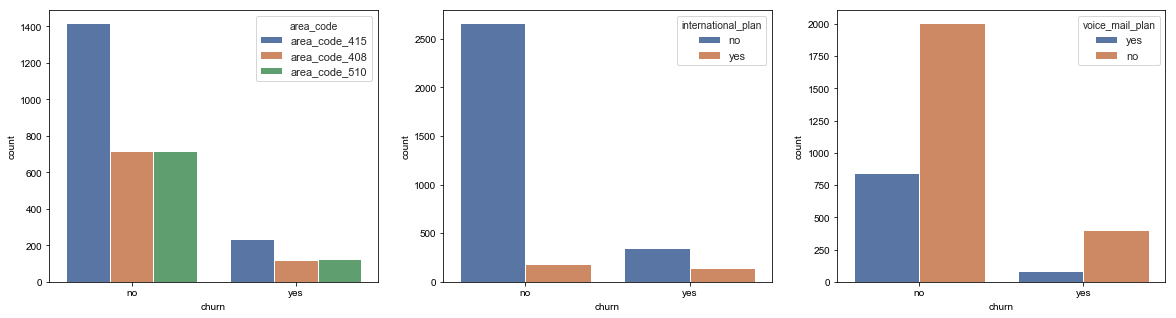

In [13]:
vars_str0 = vars_str.drop(columns=['state','churn'])

fig , ax = plt.subplots(1,3,figsize=(20,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat, vars_str0):
    sns.countplot(x=df_train["churn"],hue=df_train[col],ax=axis)


Acima temos a distribuição dos clientes em relação a area_code, international_plan e voice_mail_plan considerando os clientes que cancelaram ou não seus planos.

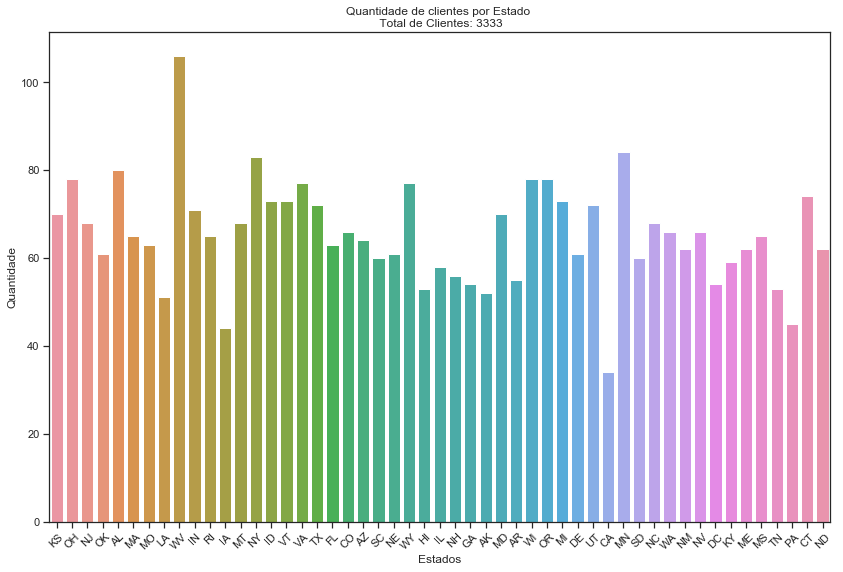

In [14]:
plt.figure(figsize=(14,9))
g = sns.countplot(df_train['state'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.xlabel("Estados")
plt.ylabel("Quantidade")
plt.xlabel("Estados")
plt.title("Quantidade de clientes por Estado \n Total de Clientes: " + str(df_train['churn'].count()))
plt.show()

Podemos ver que o estado WV possui maior quantidade de clientes, enquanto CA possui menor quantidade. 

Total de clientes na área 415: 1655
Total de clientes na área 408: 840
Total de clientes na área 510: 838


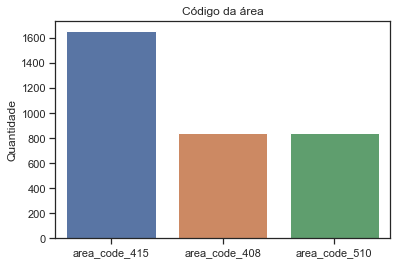

In [15]:
# Gráfico da quantidade de clientes por código de área
print("Total de clientes na área 415: " + str(df_train['area_code'].value_counts()[0]))
print("Total de clientes na área 408: " + str(df_train['area_code'].value_counts()[1]))
print("Total de clientes na área 510: " + str(df_train['area_code'].value_counts()[2]))

plt.figure()
g = sns.countplot(df_train['area_code'])
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Código da área") 
plt.show()

É, parece que temos praticamente o dobro de clientes na area 415 em relação às outras duas áreas. Algo bem significativo.

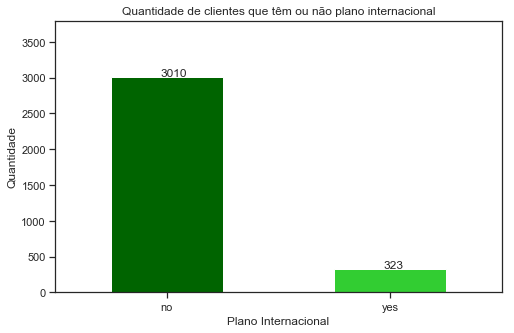

In [16]:
inter = df_train['international_plan'].value_counts().plot(kind='bar', figsize=(8,5), color=('darkgreen','limegreen'))

for p in inter.patches:
    b = p.get_bbox()
    inter.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel("Plano Internacional")
plt.ylabel("Quantidade")
plt.title("Quantidade de clientes que têm ou não plano internacional")
plt.ylim(0,3800)
plt.show()

Não ter plano internacional é a preferência de 90% dos clientes. 

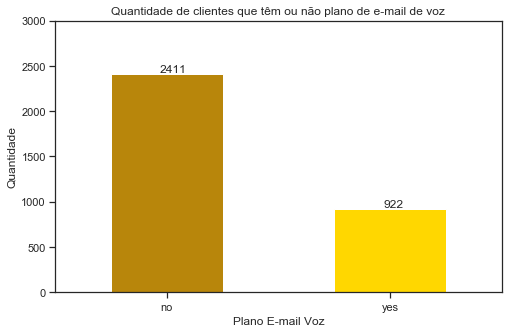

In [17]:
voice = df_train['voice_mail_plan'].value_counts().plot(kind='bar', figsize=(8,5), color=('darkgoldenrod','gold'))

for p in voice.patches:
    b = p.get_bbox()
    voice.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel("Plano E-mail Voz")
plt.ylabel("Quantidade")
plt.title("Quantidade de clientes que têm ou não plano de e-mail de voz")
plt.ylim(0,3000)
plt.show()

Agora, vamos analisar a distribuição de clientes que cancelaram ou não seu plano. É uma importante análise para que possamos entender a proporção de satisfação dos clientes com o serviço e fazer as previsões.

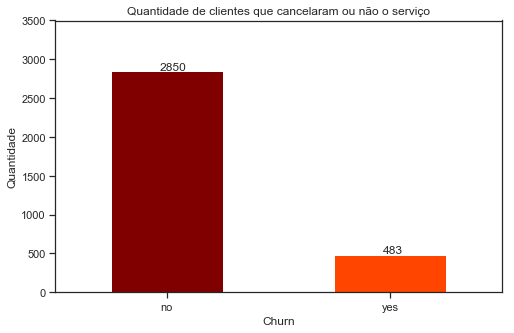

In [18]:
# Distribuição Variável Resposta 
churn = df_train['churn'].value_counts().plot(kind='bar', figsize=(8,5), color=('maroon','orangered'))

for p in churn.patches:
    b = p.get_bbox()
    churn.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel("Churn")
plt.ylabel("Quantidade")
plt.title("Quantidade de clientes que cancelaram ou não o serviço")
plt.ylim(0,3500)
plt.show()


Vemos que 85,5% dos clientes não cancelaram o serviço. Isso é um ótimo sinal. 

Agora, percebemos que há um grande desbalanceamento dos dados. Por isso, mais a frente, teremos que usar técnicas de balanceamento do dataset. 

As variáveis qualitativas estão no padrão object (string) e poderemos ter problemas quando for construir o modelo. Para evitar qualquer tipo de erro, trasnformaremos essas variáveis em categóricas, a fim de deixar em fomatos númericos. Isso serve tanto para a base de treino quanto para a bsae de teste.

In [19]:
# Transformar variáveis object para category
for col in vars_str:
    df_train[col] = df_train[col].astype('category').cat.codes
    
for col in vars_str:
    df_test[col] = df_test[col].astype('category').cat.codes

Estamos interessados em analisar a correlação entras as nossas variáveis. Variáveis altamente correlacionadas podem causar problemas de multicolinearidade e enviesar noss modelo. 

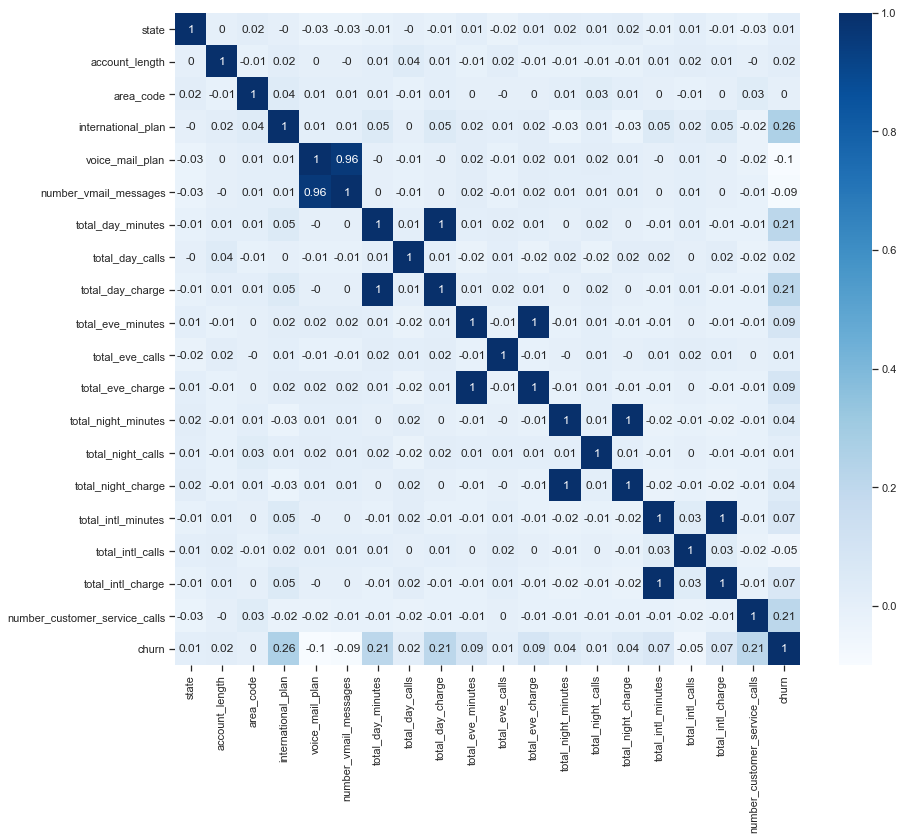

In [20]:
# Correlação entre as variáveis
def plot_correlation(cor):
    plt.figure(figsize=(14,12))
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    plt.show()
    
cor = round(df_train.corr(),2)
plot_correlation(cor)

Temos diversas variáveis correlacionadas. Para cada par delas, uma será retirada do dataset e treinar o modelo em cima das outras. Antes disso, faremos a seleção de variáveis mais importantes utilizando o método Ensemble. 

## Balancemento dos dados

Como dito anteriormente, temos um dataset altamente desbalanceado. A consequência disso para a construção de um modelo de machine leanring é que ele terá uma tendência a dar muitos "alarmes falsos". Ou seja, na prática ele irá responder muito bem para as classes majoritárias e terá um desempenho inferior para classes minoritárias. Portanto, precisamos usar técnicas para atacar o problema. 

Aqui, usaremos a função RandomOverSampler para igualar a quantidade de dados em relação a classe majoritária. 

In [21]:
# Balanceando os dados 
from imblearn.over_sampling import RandomOverSampler

x = df_train.drop(columns=['churn'])
y = df_train['churn']

ros = RandomOverSampler()
x_over, y_over = ros.fit_sample(x, y)

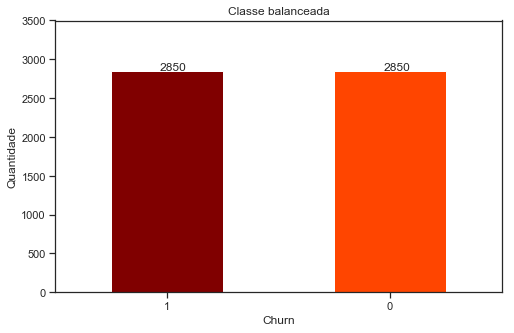

In [22]:
churn_over = y_over.value_counts().plot(kind='bar', figsize=(8,5), color=('maroon','orangered'))

for p in churn_over.patches:
    b = p.get_bbox()
    churn_over.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel("Churn")
plt.ylabel("Quantidade")
plt.title("Classe balanceada")
plt.ylim(0,3500)
plt.show()

Pronto, temos os dados balanceados. Antes de dar início ao processo de criação do modelo, iremos fazer a feature selection.

In [23]:
# função para plotar as variáveis mais importantes
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(16,12))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.grid()
    plt.show()

#### Método Ensemble para Seleção de Variáveis

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

# Criando o modelo Feature Selection 
model = ExtraTreesClassifier()
model.fit(normalize(x_over), y_over)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Bagged Decision Trees, chamado de Método Ensemble, pode ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo e quanto maior o score, mais importante é o atributo.

In [25]:
# Cria um dataframe com as features da base junto com score obtido pelo modelo ExtraTreesClassifier
df_atr = pd.DataFrame({'Features': x_over.columns,
                      'Score_Features': model.feature_importances_})

# Trazer variaveis com Score
rotulos = df_atr.sort_values(by=['Score_Features'], ascending=False)

Criamos um 'plot' para visualização da importância das variáveis.

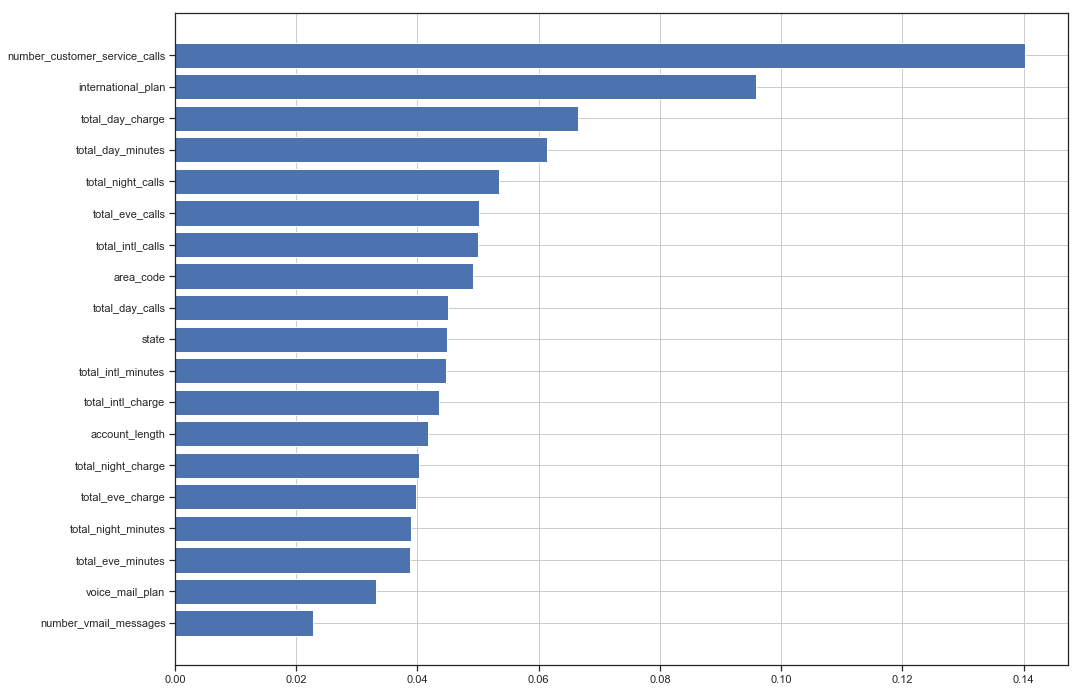

In [26]:
f_importances(rotulos['Score_Features'], rotulos['Features'])

Já temos as variáveis mais importantes para o modelo. Agora voltaremos à correlação entre as variáveis e entre as que tiveram uma alta correlação, iremos excluir as que foram menos importantes.

In [27]:
# Retirar variaveis que são altamente correlacionadas - treino
var_cor = ['total_intl_charge','total_night_charge','total_eve_charge', 'total_day_minutes', 'number_vmail_messages']
df_train0 = df_train.drop(columns=var_cor)
df_train0.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [28]:
# Retirar variaveis que são altamente correlacionadas - teste
df_test0 = df_test.drop(columns=var_cor)
df_test0.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churn'],
      dtype='object')

### Criação do modelo

Utilizaremos Cross Validation para avaliar a performance do modelo. Com essa técnica, os dados serão dividiso em k-folds. Cada parte é chamada de fold e o algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão. Aqui, determinaremos 10 folds. 

In [29]:
# Parametros para KFold
folds = 10
seed = 2

# Separando os dados em folds
kfold = KFold(folds, True, random_state = seed)

Abaixo, vamos separar a coluna target das demais no dataset de teste.

In [30]:
x_test = df_test0.drop(columns='churn')
y_test = df_test0['churn']

# Drop atributos correlacionados
x_over0 = x_over.drop(columns=var_cor)

#### Padronizando os dados

Algoritmos de regressão logística esperam que os dados estejam em uma distribuição normal, onde a média é igual a 0 e os desvio padrão é igual a 1. Para isso, utilizaremos a função StandardScaler() com intuito de padronizar os atributos.

In [31]:
from sklearn.preprocessing import StandardScaler 

# Padronizando os dados (0 para a média, 1 para o desvio padrão)
scaler = StandardScaler()

# Dados de treino e teste padronizados
standardX = scaler.fit_transform(x_over0)
standardX_test = scaler.fit_transform(x_test)

#### Seleção do modelo

Com os dados padronizados, iremos fazer o treinamento de diversos modelos de classificação. A função cross_val_score() avaliará a perfomance do modelo e trazer acurácia. 

LR: 0.731930 (0.033562)
LDA: 0.731930 (0.036140)
NB: 0.792105 (0.064265)
KNN: 0.889298 (0.062118)
CART: 0.969123 (0.025607)
SVM: 0.902105 (0.011255)


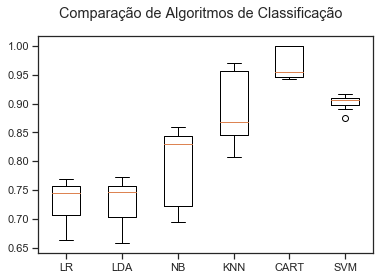

In [33]:
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = folds, random_state = seed)
    cv_results = cross_val_score(modelo, standardX, y_over, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

O modelo com melhor acurácia foi o Classification and Regression Trees. Portanto, utilizaremos ele para fazer as previsões. 

In [39]:
trees = DecisionTreeClassifier()
trees.fit(standardX, y_over)

previsoes = trees.predict(standardX_test)

print('Accuracy :',accuracy_score(y_test, previsoes))
print(confusion_matrix(y_test, previsoes))
print(classification_report(y_test, previsoes))


Accuracy : 0.8584283143371326
[[1263  180]
 [  56  168]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1443
           1       0.48      0.75      0.59       224

    accuracy                           0.86      1667
   macro avg       0.72      0.81      0.75      1667
weighted avg       0.89      0.86      0.87      1667

